In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/Andry.jpg')
img.shape

(450, 300, 3)

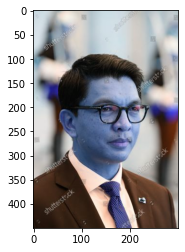

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(450, 300)

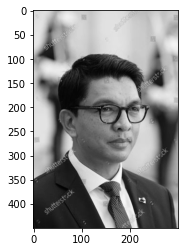

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/data/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 96, 141, 168, 168]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(96, 141, 168, 168)

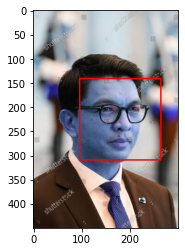

In [8]:
face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2 )
plt.imshow(face_img)

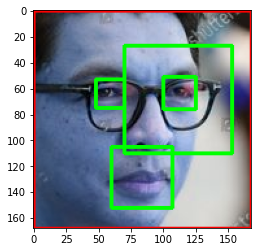

In [9]:
cv2.destroyAllWindows()

for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew,ey+eh), (0,255,0), 2)

        
plt.figure()
plt.imshow(roi_color, cmap='gray')
plt.show()

In [10]:
cropped_img = np.array(roi_color)
cropped_img.shape

(168, 168, 3)

In [11]:
#Preprocessing using wavelet transform as a feature for training our model
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


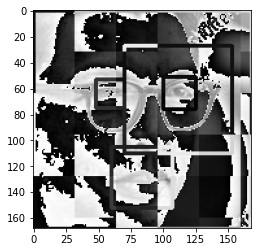

In [12]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [13]:
#Load image, detect face: if eyes >= 2, save and crop the face region
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

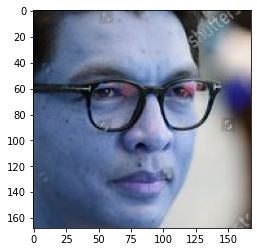

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Andry.jpg')
plt.imshow(cropped_image)

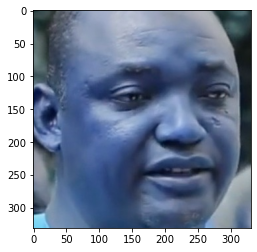

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Adama.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./images_dataset"
path_to_cr_data = "./images_dataset/cropped/"
# new_img_dirs = []
# new_img_dirs

In [47]:
# import os
# new_img_dirs = []
# for entry in os.scandir(path_to_data):
#     if entry.is_dir():
#         new_img_dirs.append(entry.path)
# for index, img_dir in enumerate(new_img_dirs):
#     print(index, img_dir)
#     for count, g in enumerate(os.listdir(img_dir)):
#         print(g)
#         f_name, f_ext = os.path.splitext(g)
#         f_name = "img" +'_'+ str(count)

#         new_name = f'{f_name}{f_ext}'
#         os.rename(os.path.join(img_dir,g), os.path.join(img_dir,new_name))

0 ./images_dataset\.ipynb_checkpoints
1 ./images_dataset\AbdelFattahelSisiEgypt
pimage_0.jpg
pimage_1.jpg
pimage_10.jpg
pimage_11.jpg
pimage_12.jpg
pimage_13.jpg
pimage_14.jpg
pimage_15.jpg
pimage_16.jpg
pimage_17.jpg
pimage_18.jpg
pimage_19.jpg
pimage_2.jpg
pimage_20.jpg
pimage_21.jpg
pimage_22.png
pimage_23.jpg
pimage_24.jpg
pimage_25.jpg
pimage_26.jpg
pimage_27.jpg
pimage_28.jpg
pimage_29.jpg
pimage_3.jpg
pimage_30.jpg
pimage_31.jpg
pimage_32.jpg
pimage_33.jpg
pimage_34.jpg
pimage_35.jpg
pimage_36.jpg
pimage_37.jpg
pimage_38.jpg
pimage_39.png
pimage_4.png
pimage_40.jpg
pimage_41.jpg
pimage_42.jpg
pimage_43.jpg
pimage_44.jpg
pimage_45.jpg
pimage_46.jpg
pimage_47.jpg
pimage_48.png
pimage_49.jpg
pimage_5.jpg
pimage_50.jpg
pimage_51.jpg
pimage_52.jpg
pimage_53.jpg
pimage_54.png
pimage_55.jpg
pimage_56.jpg
pimage_57.jpg
pimage_58.jpg
pimage_59.jpg
pimage_6.jpg
pimage_60.jpg
pimage_61.png
pimage_62.jpg
pimage_63.jpg
pimage_64.jpg
pimage_65.jpg
pimage_7.jpg
pimage_8.jpg
pimage_9.jpg
2 ./im

19 Gabon President Ali Bongo Ondimba....jpg
569 President Of Gabon Photos and....jpg
Ailing Gabonese President....jpg
Alain-Bernard _Ali_ Bongo Ondimba....jpg
Ali Bongo Ondimba (_PresidentABO) _ Twitter.jpg
Ali Bongo Ondimba - Alchetron_ The Free....jpg
Ali Bongo Ondimba - Wikidata.png
Ali Bongo Ondimba - Wikipedia.jpg
Ali Bongo Ondimba - アジェンダ寄稿者 _ 世....jpeg
Ali Bongo Ondimba Stock Photo - Alamy.jpg
Ali Bongo Ondimba s_adressant....jpg
Ali Bongo Ondimba with Pierre....jpg
Ali Bongo Ondimba _ Arab News.jpg
Ali Bongo Ondimba _ Historica Wiki _ Fandom.jpg
Ali Bongo Ondimba _ PENRESA I A Vision....jpg
Ali Bongo Ondimba_ How Gabon _sick....jpg
Ali Bongo Ondimba_ President of....jpg
Ali Bongo Ondimba_ Shared challenges.jpg
Ali Bongo receiving medical treatment....jpg
Ali-Bongo-Ondimba _ The Guardian....jpg
File_Ali Bongo Ondimba at Chatham House....jpg
File_Ali Bongo Ondimba_ 2012.jpg ....jpg
GABON - L_AGENDA DIPLOMATIQUE D_ALI....jpg
Gabon Ali Bongo Ondimba • President... (2).jpg
Gabon Pre

summons of Laya for the Ghali case.jpg
Supreme Court rejects custody request....jpg
To avoid arrest_ Brahim Ghali misses a....png
verify identity of Brahim Ghali....png
Western Sahara independence leader....jpg
Western Sahara rebel leader....jpg
Western Sahara talks with Rabat....jpg
Western Sahara_ President Brahim Ghali....jpg
10 ./images_dataset\CyrilRamaphosaSouthAfrica
A Sona storyboard_ here_s what you....jpeg
Acceptance Statement by President Cyril....jpg
Amazon _ Cyril Ramaphosa_ The Road to....jpg
Analysis _ Ramaphosa_s Sisulu drama is....jpg
Could Cyril Ramaphosa Be the Best....jpg
Cyril Matamela Ramaphosa _ South....jpg
Cyril Ramaphosa - South African union....jpg
Cyril Ramaphosa - The Japan Times.jpg
Cyril Ramaphosa - Wikipedia.jpg
Cyril Ramaphosa authorises SIU probe....jpg
Cyril Ramaphosa condemns Zimbabwe bomb....jpg
Cyril Ramaphosa elected as president of....jpg
Cyril Ramaphosa steps up for ethics....jpg
Cyril Ramaphosa sworn in as South....jpeg
Cyril Ramaphosa _ Laws t

Emmerson Mnangagwa – Asia Times.jpg
Emmerson Mnangagwa_ Biography_ Zimbabwe....jpg
Emmerson Mnangagwa_ Brexit a _Good....jpg
Emmerson Mnangagwa_ The Crocodile who... (1).jpg
Emmerson Mnangagwa_ Will Zimbabwe_s new....jpg
Emmerson Mnangagwa_s election....jpg
President Emmerson Mnangagwa addresses....jpg
President Emmerson Mnangagwa Turns 79....jpg
President Mnangagwa addresses the nation.jpg
s President Emmerson Mnangagwa endorsed....jpg
Zimbabwe - Emmerson Dambudzo Mnangagwa.jpg
Zimbabwe delays Mnangagwa inauguration....jpg
Zimbabwe President Emmerson Mnangagwa....jpg
Zimbabwe presidential polls_ Emmerson....jpg
ZIMBABWE _ Mnangagwa battered by VP....jpg
ZIMBABWE _ Mnangagwa struggles to rule....jpg
Zimbabwean President Emmerson Mnangagwa... (2).jpg
ZIMBABWEAN PRESIDENT EMMERSON MNANGAGWA... (5).jpg
Zimbabwean President Emmerson Mnangagwa....jpg
Zimbabwe_ Imihanda 10 igiye kwitirirwa....jpg
Zimbabwe_ Mnangagwa_s first year in....png
Zimbabwe_ The Mnangagwa squad.jpg
15 ./images_dataset

Libya′s UN-backed PM al-Sarraj says he....jpg
More about fayez-al-sarraj _ Africanews.jpg
National Accord government to step down.jpg
political challenges....jpg
Prime Minister Fayez al Sarraj....jpg
UN-backed government arrives in Tripoli....jpg
UN_ world have responsibility on Libya....jpg
Who is Fayez Al Sarraj_ All You Need To_yyth....jpg
Won_t Negotiate With Haftar Again....jpg
20 ./images_dataset\FelixTshisekediDemocraticRepublicoftheCongo
1_300 Félix Tshisekedi Photos and....jpg
560点のFélix Tshisekediのストックフォト... (1).jpg
560点のFélix Tshisekediのストックフォト... (2).jpg
560点のFélix Tshisekediのストックフォト....jpg
Africa Investment Forum.jpg
Africans_ – Felix Tshisekedi....jpg
After being unwilling_ Congo president....jpg
Can Felix Tshisekedi win DRC presidency....jpg
Chinese Mining Companies....jpg
Climate crisis and the Congo Basin_ The....jpg
Congo-Kinshasa_ President Felix....jpg
Congo-Kinshasa_ President Félix....jpg
Congolese President promises to work on....jpg
CONGO_S PRESIDENT FELIX TSHIS

Ibrahim Boubacar Keita_ President of... (1).jpg
Ibrahim Boubacar Keita_ President of... (2).jpg
Ibrahim Boubacar Keita_ President of....jpg
Ibrahim Boubacar Keïta - Wikipedia.jpg
Ibrahim Boubacar Keïta 1945 - 2022....jpg
Ibrahim Boubacar Keïta Archives....jpg
Ibrahim Boubacar Keïta est mort....jpg
Ibrahim Boubacar Keïta promised Mali....jpg
Ibrahim Boubacar Keïta_ the president....jpg
Ibrahim Boubacar Keïta_ un destin d....jpg
Ibrahim Boubacar... (2).jpg
Ibrahim Boubacar....jpg
Ibrahim Keita wins re-election in Mali....jpg
July presidential election....jpg
Mali ex-president Ibrahim Boubacar....jpg
Mali _ Ibrahim Boubacar Keïta a quitté....jpg
Mali _ Ibrahim Boubacar Keïta_ le....jpg
Mali _ le président Ibrahim Boubacar....jpg
Mali-African Union - Peace....jpg
malien Ibrahim Boubacar....jpg
Mali_ Ex-president Ibrahim Boubacar....jpg
Mali_ President Ibrahim Boubacar Keita....jpg
Mali_s deposed president Ibrahim....jpg
Mali_s Ex-President Keita Dies As....png
Mali_s ousted president Ibrah

Julius Maada Bio_ President of Sierra....jpg
Julius Maada Bio_ Sierra Leone_s....jpg
Julius Maada Bio_ The Victory of a....jpg
Julius Maada Bio_s mining putsch....jpg
Julius Maada Wonie Bio _ Njala University.jpg
Mining Indaba Virtual 2021....jpg
President Julius Maada Bio announces....jpg
President Julius Maada Bio Departs....jpg
President Julius Maada Bio of Sierra....jpg
President Julius Maada Bio speaks on....jpg
President Julius Maada Bio to attend....jpg
President Julius Maada Bio... (3).jpg
president Julius Maada Bio... (5).jpg
President Julius Maada Bio....jpg
President of Sierra Leone Julius Maada....jpg
Retired Brigadier Julius Maada Bio Is....jpg
Sierra Leone President Julius Maada Bio....jpg
Sierra Leone president suspends state....jpg
SIERRA LEONE_ President Bio exclusive....jpg
Sierra Leone_ President Julius Maada....jpg
Sierra Leone_s fight against corruption....jpg
Sierra Leone_s new president Bio....jpg
Sierra Leone_s new president doesn_t....jpg
Sierra Leone_s Preside

King Mswati III changes his kingdom_s....jpg
King Mswati III is born _ South African....jpg
King Mswati III of Eswatini - THE....jpg
King Mswati III of Swaziland changes....jpg
King Mswati III Renames Swaziland As....jpg
Mass protests rock Eswatini_ Africa_s....jpg
Meet King Mswati III of Swaziland... (1).jpg
Meet King Mswati III – the absolute....jpg
Mswati III - Wikipedia (1).jpg
Mswati III - Wikipedia.jpg
Mswati III - Wikiwand.jpg
Mswati III _ Biography & Facts _ Britannica.jpg
oust King Mswati says EFF Swaziland.jpg
Southern African bloc says Eswatini....jpg
Swaziland King Demonstrates How He Is....jpg
Swaziland king officially renames....jpg
Swaziland King Was Secretly....jpg
SWAZILAND MSIMU WA UMHLANGA UMEFIKA.jpg
The Story Of Eswatini_s King Mswati III... (1).jpg
The Story Of Eswatini_s King Mswati III... (2).jpg
41 ./images_dataset\MuhammaduBuhariNigeria
2021 Democracy Day speech....jpg
Analysis_ Buhari_ How Not to Fail - The....png
Buhari loses driver.jpg
Buhari signs historic

11 Avril 2021_ Patrice Talon....jpg
218点のPatrice Talonのストックフォト - Getty... (1).jpg
218点のPatrice Talonのストックフォト - Getty... (2).jpg
218点のPatrice Talonのストックフォト - Getty....jpg
881 Patrice Talon Photos and Premium....jpg
Ainsi parle Patrice Talon_ Président de....jpg
Au Bénin_ Patrice Talon assume l....jpg
BENIN - Discours de fin d_année du....jpg
Benin court validates Patrice Talon_s....jpg
Benin goes to the polls in an election....jpg
Benin President Patrice Talon pledges....jpg
Benin president Patrice Talon underwent....jpg
Benin profile - Leaders - BBC News.jpg
BENIN _ Talon dishing out honours left....jpg
Beninese President Talon says....jpg
Benin_ Patrice Talon reelected....jpg
BENIN_ Patrice Talon wants to make....jpg
BENIN_ President Patrice Talon....jpeg
Benin_ President Patrice Talon....jpg
Benin_ Talon is cracking down on....jpg
BENIN_IVORY COAST _ Election high and....jpg
Benin_s President Patrice Talon sworn....jpg
Benin_s President Patrice Talon wins re....png
Benin_s Talon swor

BURKINA FASO _ Kaboré overhauls mining....jpg
BURKINA FASO _ Kaboré plans to make a....jpg
Burkina Faso_ A New Mandate for....jpg
Burkina Faso_ President Kabore Sworn In....jpg
Burkina Faso_ Reelection for Roch Marc....jpg
Burkina Faso_ Roch Marc Christian....jpg
Burkina Faso_ Why citizens are....jpg
Burkina Faso_Présidentielle _ Roch Marc....jpg
Burkina Faso_s new government a....jpg
Burkina Faso_s President Roch Marc... (1).jpg
Burkina _ Roch Marc Christian Kaboré....jpg
de Roch Marc Christian KABORE_ candidat....jpg
democratic road ahead for Burkina Faso....jpg
fight terrorism in sub-Saharan Sahel....jpg
File_Roch Marc Christian Kaboré (05-06....jpg
File_Roch Marc Christian Kaboré MSC....jpg
File_Roch Marc Christian Kaboré....jpg
Kaboré ya ziyarci soja a fagen daga....jpg
la main tendue de Roch Marc Christian....jpg
Ousted Burkina Faso president Kabore....jpg
Ousted Burkina president Roch Marc....png
President Roch Kabore....jpg
Roch Marc Christian Kabore - Eagle Online.jpg
Roch Mar

In [27]:
# img_dirs

['./images_dataset\\AbdelFattahelSisiEgypt',
 './images_dataset\\AbdelmadjidTebbouneAlgeria',
 './images_dataset\\AdamaBarrowTheGambia',
 './images_dataset\\AlassaneOuattaraIvoryCoast',
 './images_dataset\\AliBongoOndimbaGabon',
 './images_dataset\\AlphaCondeGuinea',
 './images_dataset\\AndryRajoelinaMadagascar',
 './images_dataset\\AzaliAssoumaniComoros',
 './images_dataset\\BrahimGhaliWesternSahara',
 './images_dataset\\cropped',
 './images_dataset\\CyrilRamaphosaSouthAfrica',
 './images_dataset\\DannyFaureSeychelles',
 './images_dataset\\DenisSassouNguessoRepublicoftheCongoBrazaville',
 './images_dataset\\EdgarLunguZambia',
 './images_dataset\\EmmersonMnangagwaZimbabwe',
 './images_dataset\\EvaristeNdayishimiyeBurundi',
 './images_dataset\\EvaristoCarvalhoSaoTomeAndPrincipe',
 './images_dataset\\FaureGnassingbeTogo',
 './images_dataset\\FaustinArchangeTouaderaCentralAfricanRepublic',
 './images_dataset\\FayezalSarrajLibya',
 './images_dataset\\FelixTshisekediDemocraticRepublicoftheC

In [17]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
#     if entry.is_dir():
    img_dirs.append(entry.path)

In [18]:
img_dirs

['./images_dataset\\.ipynb_checkpoints',
 './images_dataset\\AbdelFattahelSisiEgypt',
 './images_dataset\\AbdelmadjidTebbouneAlgeria',
 './images_dataset\\AdamaBarrowTheGambia',
 './images_dataset\\AlassaneOuattaraIvoryCoast',
 './images_dataset\\AliBongoOndimbaGabon',
 './images_dataset\\AlphaCondeGuinea',
 './images_dataset\\AndryRajoelinaMadagascar',
 './images_dataset\\AzaliAssoumaniComoros',
 './images_dataset\\BrahimGhaliWesternSahara',
 './images_dataset\\CyrilRamaphosaSouthAfrica',
 './images_dataset\\DannyFaureSeychelles',
 './images_dataset\\DenisSassouNguessoRepublicoftheCongoBrazaville',
 './images_dataset\\EdgarLunguZambia',
 './images_dataset\\EmmersonMnangagwaZimbabwe',
 './images_dataset\\EvaristeNdayishimiyeBurundi',
 './images_dataset\\EvaristoCarvalhoSaoTomeAndPrincipe',
 './images_dataset\\FaureGnassingbeTogo',
 './images_dataset\\FaustinArchangeTouaderaCentralAfricanRepublic',
 './images_dataset\\FayezalSarrajLibya',
 './images_dataset\\FelixTshisekediDemocraticRep

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
african_presidents_file_names_dict = {}


for img_dir in img_dirs:
    count = 1
    african_president_name = img_dir.split('\\')[-1]
    african_presidents_file_names_dict[african_president_name] = []   
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None: 
            cropped_folder = path_to_cr_data + african_president_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                
            cropped_file_name = african_president_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            african_presidents_file_names_dict[african_president_name].append(cropped_file_path)
            count += 1

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [23]:
#manually examine cropped folder and delete any unwanted images

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'./images_dataset/cropped/AbdelFattahelSisiEgypt': ['./images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt1.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt10.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt11.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt12.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt13.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt14.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt15.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt16.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt17.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt18.png',
  './images_dataset/cropped/AbdelFattahelSisiEgypt\\AbdelFattahelSisiEgypt19.png',
  './images_dataset/cropped/AbdelFatt

In [24]:
class_dict = {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'./images_dataset/cropped/AbdelFattahelSisiEgypt': 0,
 './images_dataset/cropped/AbdelmadjidTebbouneAlgeria': 1,
 './images_dataset/cropped/AdamaBarrowTheGambia': 2,
 './images_dataset/cropped/AlassaneOuattaraIvoryCoast': 3,
 './images_dataset/cropped/AliBongoOndimbaGabon': 4,
 './images_dataset/cropped/AlphaCondeGuinea': 5,
 './images_dataset/cropped/AndryRajoelinaMadagascar': 6,
 './images_dataset/cropped/AzaliAssoumaniComoros': 7,
 './images_dataset/cropped/BrahimGhaliWesternSahara': 8,
 './images_dataset/cropped/CyrilRamaphosaSouthAfrica': 9,
 './images_dataset/cropped/DannyFaureSeychelles': 10,
 './images_dataset/cropped/DenisSassouNguessoRepublicoftheCongoBrazaville': 11,
 './images_dataset/cropped/EdgarLunguZambia': 12,
 './images_dataset/cropped/EmmersonMnangagwaZimbabwe': 13,
 './images_dataset/cropped/EvaristeNdayishimiyeBurundi': 14,
 './images_dataset/cropped/EvaristoCarvalhoSaoTomeAndPrincipe': 15,
 './images_dataset/cropped/FaureGnassingbeTogo': 16,
 './images_dataset/cr

In [25]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scaled_raw_img=cv2.resize(img, (32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)

In [27]:
#model training
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [29]:
pipe = Pipeline([('scaler',StandardScaler()),('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.39826839826839827

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.32      0.67      0.43        12
           1       0.25      1.00      0.40        10
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.20      1.00      0.33         1
           6       0.21      0.50      0.30         6
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.46      0.55      0.50        11
          11       1.00      0.29      0.44         7
          12       0.50      0.17      0.25         6
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4
          16       0.36      0.50      0.42         8
          17       0.33      0.17      0.22         6
          18       1.00    

C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Using grid search CV to test different models and parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [33]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.417391,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.191304,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.504348,{'logisticregression__C': 1}


In [34]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [35]:
best_estimators['svm'].score(X_test, y_test)

0.4935064935064935

In [36]:
best_estimators['random_forest'].score(X_test, y_test)

0.18181818181818182

In [37]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.5238095238095238

In [38]:
best_clf = best_estimators['logistic_regression']

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0, ...,  0,  0,  0],
       [ 1,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 1,  0,  1, ...,  0,  0,  0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

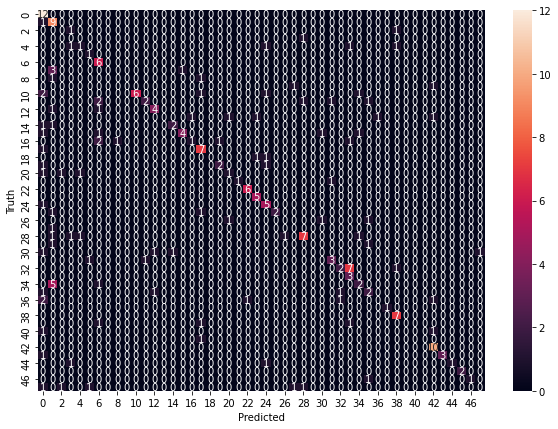

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'african_presidents_model.pkl')

['african_presidents_model.pkl']

In [42]:
import json
#save class dictionary
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))